https://dev.meteostat.net/python/

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [2]:
# import meteostat as mt
from meteostat import Stations,Daily,Hourly

In [3]:
stations = Stations()
stations = stations.region('US')
stations = stations.fetch(99999)

In [4]:
(stations["icao"]=="KTMB").sum()

1

### Are all weather stations available

In [5]:
data = pd.read_csv("../data/US_Accidents_Dec21_updated 2.csv")
stations_data = data["Airport_Code"].unique()

In [6]:
stations_mt = stations["icao"].unique()
len(set(stations_data) - set(stations_mt))

92

In [7]:
92*100/len(stations_mt)

3.4495688038995125

#### of stations unavailable how many obs count for them

53


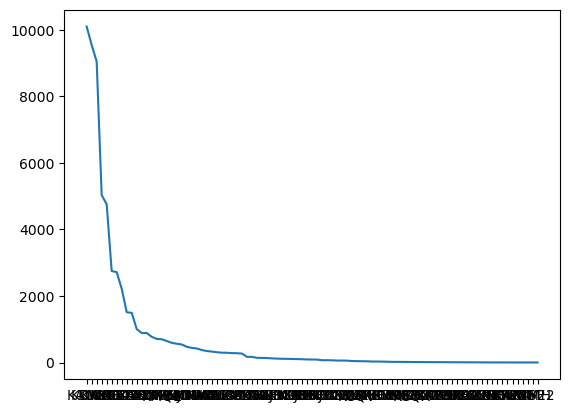

In [8]:
missing_stations = set(stations_data) - set(stations_mt)
val_cnts_missing_stations = data[data["Airport_Code"].isin(missing_stations)]["Airport_Code"].value_counts()
print((val_cnts_missing_stations>50).sum())
plt.plot(val_cnts_missing_stations)

### get historical weather for station data

<Axes: >

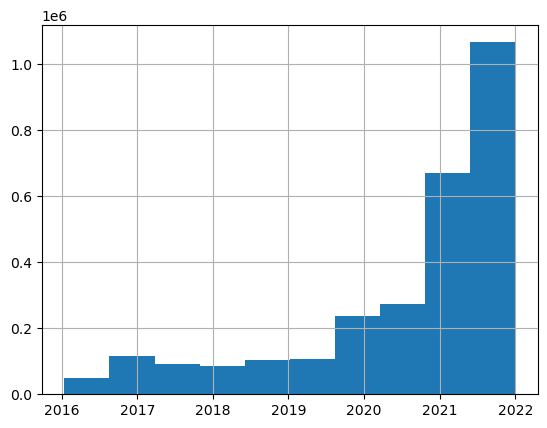

In [9]:
pd.to_datetime(data["Weather_Timestamp"]).hist()

In [10]:
def scrape_one_station(station_id):
    # Set time period
    start = datetime(2019, 1, 1)
    end = datetime(2023, 12, 31, 23, 59)
    weather_hist = Hourly(station_id, start, end).fetch().reset_index()
    return weather_hist

In [11]:
from tqdm.notebook import tqdm

In [12]:
map_api_to_stn = stations.icao.to_dict()
map_stn_to_api = {v: k for k, v in map_api_to_stn.items()}

In [13]:
n_err = 0
for station_i in tqdm(stations_data):
    try:
        staion_id_api = map_stn_to_api[station_i]
    except:
        print(f"{station_i} not found in map_stn_to_api")
        n_err+=1
        continue
    try:
        weather_i = scrape_one_station(staion_id_api)
    except:
        print(f"{station_i}: error in scraping")
        n_err+=1
        continue
    weather_i["staion_id_data"] = station_i
    weather_i["staion_id_api"] = staion_id_api
    weather_i.to_csv(f"../data/weather_history/{station_i}_hist.csv")

  0%|          | 0/2005 [00:00<?, ?it/s]

K1II not found in map_stn_to_api
KLOU not found in map_stn_to_api
nan not found in map_stn_to_api
KOVE not found in map_stn_to_api
KMYF not found in map_stn_to_api
KBUO not found in map_stn_to_api
KNZY not found in map_stn_to_api
KNKA not found in map_stn_to_api


KNFW not found in map_stn_to_api


KL38 not found in map_stn_to_api
KAWN not found in map_stn_to_api


KCNW not found in map_stn_to_api


K7R3 not found in map_stn_to_api


KH21 not found in map_stn_to_api


KIAB not found in map_stn_to_api


KBAD not found in map_stn_to_api


KUNR not found in map_stn_to_api
KIKA not found in map_stn_to_api


KM16 not found in map_stn_to_api


KFTG not found in map_stn_to_api


KSIB not found in map_stn_to_api


KAUD not found in map_stn_to_api


K9A1 not found in map_stn_to_api


K01M not found in map_stn_to_api


KIGX not found in map_stn_to_api


KWBC not found in map_stn_to_api


KRYT not found in map_stn_to_api


K5W8 not found in map_stn_to_api
KVSH not found in map_stn_to_api


KMQE not found in map_stn_to_api
K19A not found in map_stn_to_api


KMUL not found in map_stn_to_api


KI39 not found in map_stn_to_api


KK22 not found in map_stn_to_api


KCQX not found in map_stn_to_api


KDMA not found in map_stn_to_api
KT62 not found in map_stn_to_api


KU28 not found in map_stn_to_api
KWEY not found in map_stn_to_api


KS14 not found in map_stn_to_api
KCTD not found in map_stn_to_api


KIDV not found in map_stn_to_api
K77M not found in map_stn_to_api
KARL not found in map_stn_to_api
K9BB not found in map_stn_to_api
KCMS not found in map_stn_to_api
K3TH not found in map_stn_to_api


K4CR not found in map_stn_to_api
KPUM not found in map_stn_to_api
K4BL not found in map_stn_to_api


KEPZ not found in map_stn_to_api
KCRV not found in map_stn_to_api
K4HV not found in map_stn_to_api
KHMM not found in map_stn_to_api


KDRC not found in map_stn_to_api
KE80 not found in map_stn_to_api


K3HT not found in map_stn_to_api


KB23 not found in map_stn_to_api


KCQV not found in map_stn_to_api


KO87 not found in map_stn_to_api
KS47 not found in map_stn_to_api
KJNW not found in map_stn_to_api
K3DU not found in map_stn_to_api
KCHJ not found in map_stn_to_api


KLAW not found in map_stn_to_api
KM89 not found in map_stn_to_api
KFSK not found in map_stn_to_api
KBYH not found in map_stn_to_api
KRIM not found in map_stn_to_api


KM46 not found in map_stn_to_api


KT65 not found in map_stn_to_api
KXVW not found in map_stn_to_api


K3MW not found in map_stn_to_api


KHEY not found in map_stn_to_api


KU31 not found in map_stn_to_api


K1J0 not found in map_stn_to_api
KNBJ not found in map_stn_to_api


KAWH not found in map_stn_to_api


KPIN not found in map_stn_to_api
KT43 not found in map_stn_to_api


KTDR not found in map_stn_to_api


KP67 not found in map_stn_to_api


K9A4 not found in map_stn_to_api
KBVR not found in map_stn_to_api
KGUN not found in map_stn_to_api


KPRZ not found in map_stn_to_api
KAXO not found in map_stn_to_api


KPAT not found in map_stn_to_api


KMTR not found in map_stn_to_api
KSGE not found in map_stn_to_api


KTMH not found in map_stn_to_api
KY22 not found in map_stn_to_api


In [15]:
n_err

92